In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb
from lightgbm import LGBMClassifier

In [30]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [33]:
X_train = pd.read_csv('./Training/X_train.csv')
y_train = pd.read_csv('./Training/y_train.csv')

In [34]:
X_test = pd.read_csv('./Test/X_test.csv')

In [35]:
X_train.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [36]:
y_train.head()

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0


In [37]:
print(X_train.shape)
print(y_train.shape)

(33050, 44)
(33050, 2)


In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Unique_ID  33050 non-null  object 
 1   C1         33050 non-null  int64  
 2   C2         33050 non-null  int64  
 3   C3         33050 non-null  int64  
 4   C4         33050 non-null  int64  
 5   C5         33050 non-null  int64  
 6   C6         33050 non-null  bool   
 7   C7         33050 non-null  int64  
 8   C8         33050 non-null  bool   
 9   N1         33050 non-null  float64
 10  N2         28438 non-null  float64
 11  N3         32685 non-null  float64
 12  N4         28444 non-null  float64
 13  N5         28444 non-null  float64
 14  N6         32685 non-null  float64
 15  N7         32623 non-null  float64
 16  N8         33050 non-null  int64  
 17  N9         33050 non-null  int64  
 18  N10        32623 non-null  float64
 19  N10.1      32623 non-null  float64
 20  N11   

#### It seems like columns N25 - N32 have lot of null values. So better drop them

In [39]:
cols_to_drop = ['N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32', 'Unique_ID']
X_train.drop(cols_to_drop, axis = 1, inplace = True)
X_test.drop(cols_to_drop, axis = 1, inplace = True)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      33050 non-null  int64  
 1   C2      33050 non-null  int64  
 2   C3      33050 non-null  int64  
 3   C4      33050 non-null  int64  
 4   C5      33050 non-null  int64  
 5   C6      33050 non-null  bool   
 6   C7      33050 non-null  int64  
 7   C8      33050 non-null  bool   
 8   N1      33050 non-null  float64
 9   N2      28438 non-null  float64
 10  N3      32685 non-null  float64
 11  N4      28444 non-null  float64
 12  N5      28444 non-null  float64
 13  N6      32685 non-null  float64
 14  N7      32623 non-null  float64
 15  N8      33050 non-null  int64  
 16  N9      33050 non-null  int64  
 17  N10     32623 non-null  float64
 18  N10.1   32623 non-null  float64
 19  N11     32334 non-null  float64
 20  N12     28436 non-null  float64
 21  N14     32442 non-null  float64
 22

In [41]:
X_train.isna().sum()

C1          0
C2          0
C3          0
C4          0
C5          0
C6          0
C7          0
C8          0
N1          0
N2       4612
N3        365
N4       4606
N5       4606
N6        365
N7        427
N8          0
N9          0
N10       427
N10.1     427
N11       716
N12      4614
N14       608
N15       427
N16      4606
N17      4606
N18      4606
N19      4571
N20      4571
N21      4571
N22      4571
N23      2486
N24         0
N33         0
N34         0
N35       427
dtype: int64

In [42]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unique_ID           33050 non-null  object
 1   Dependent_Variable  33050 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 516.5+ KB


## EDA

In [43]:
# Number of unique values in C1-C8
X_train.iloc[:, :8].nunique()

C1     3
C2    21
C3    52
C4    68
C5     8
C6     2
C7     8
C8     2
dtype: int64

In [44]:
# Statistics of numberic values from N1-N35 (excluding N25-N32)
X_train.iloc[:, 8:].describe()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
count,33050.00000,28438.000000,32685.000000,28444.000000,28444.000000,32685.000000,32623.000000,33050.000000,33050.000000,32623.000000,...,28444.000000,28479.000000,28479.000000,28479.000000,28479.000000,30564.000000,33050.000000,33050.000000,33050.000000,32623.000000
mean,19.97653,81.342710,3.359361,9.574075,8.350127,3.454361,25.229930,6.082723,325.585870,0.903381,...,0.528907,11037.365322,21.764142,0.857199,0.906422,58.433363,5050.306727,125.629394,224.313536,19.587254
std,8.11087,85.397795,0.411040,5.584756,4.999040,0.411040,14.274854,4.535870,452.149358,2.635207,...,0.350046,22052.222523,12.438568,0.173017,1.227818,150.660621,6237.726330,104.391919,186.513844,7.352667
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.095000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,2.000000
25%,13.45000,21.000000,3.200000,6.000000,5.000000,3.295000,15.000000,3.000000,60.000000,0.000000,...,0.210000,523.000000,13.000000,0.770000,0.000000,26.000000,2833.333333,54.000000,98.740000,14.000000
50%,19.27500,53.000000,3.400000,9.000000,8.000000,3.495000,23.000000,5.000000,183.000000,0.000000,...,0.560000,3352.000000,20.000000,0.920000,1.000000,40.000000,4166.666667,90.000000,172.600000,19.000000
75%,26.90000,112.000000,3.600000,13.000000,11.000000,3.695000,33.000000,8.000000,420.000000,1.000000,...,0.840000,12285.000000,29.000000,1.000000,1.000000,60.000000,6250.000000,160.000000,300.947500,24.000000
max,48.00000,755.000000,4.400000,59.000000,51.000000,4.495000,129.000000,51.000000,14985.000000,83.000000,...,5.830000,646285.000000,114.000000,1.000000,20.000000,2002.000000,618547.833300,700.000000,2153.380000,64.000000


In [45]:
# numerical features we want to visualize
numerical_features = X_train.iloc[:, 8:].columns.tolist()

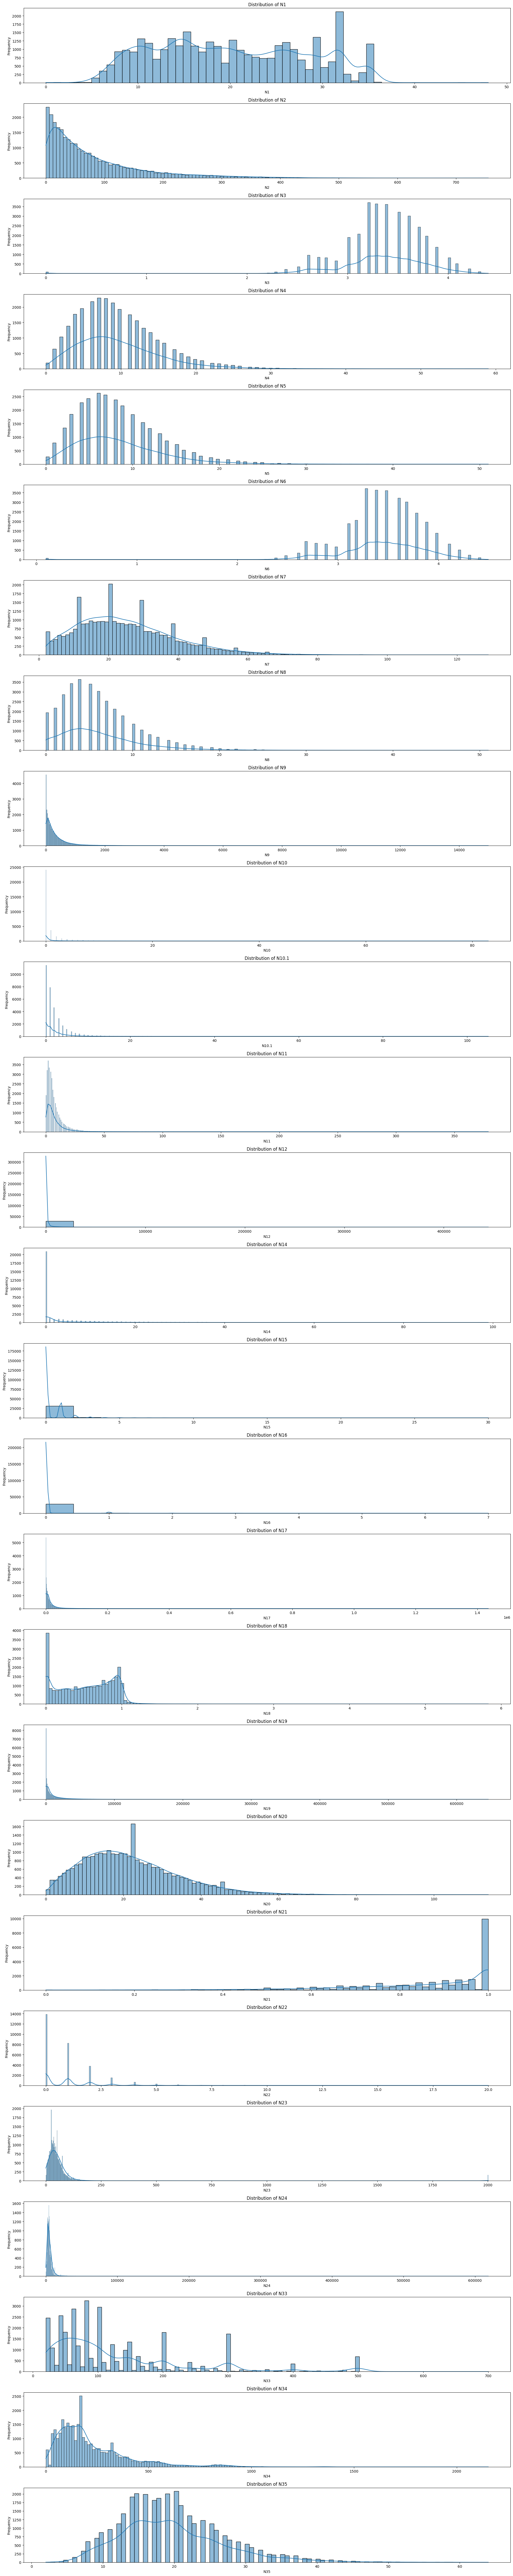

In [16]:
# distribution of numerical features

fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(20, 100))
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.histplot(data=X_train, x=feature, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [17]:
# Categories to visualize
categorical_features = X_train.iloc[:, :8].columns.tolist()

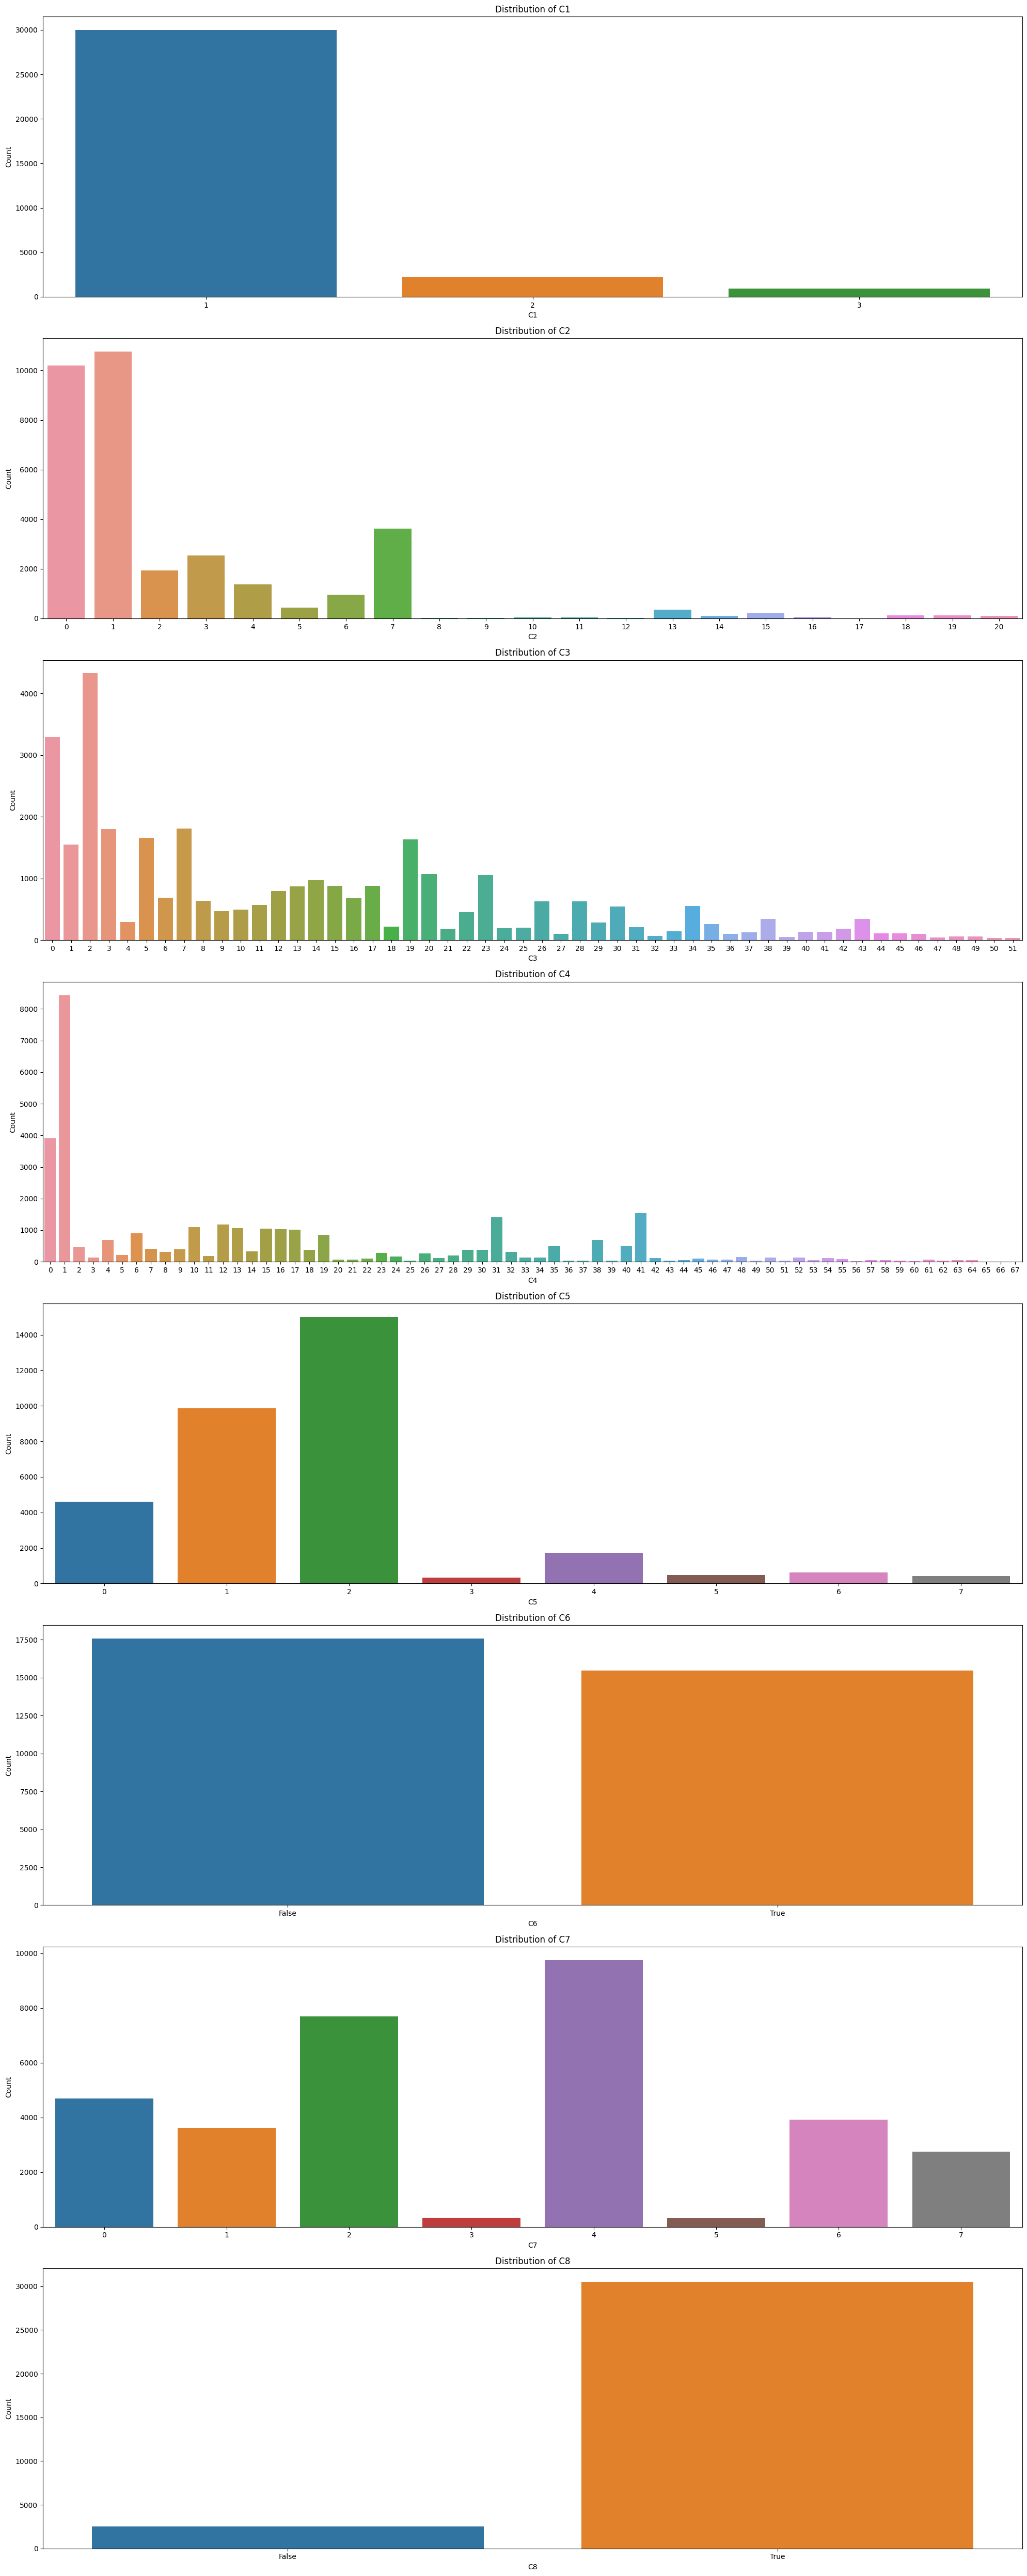

In [18]:
# Histograms of category columns
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(20, 50))
for i, feature in enumerate(categorical_features):
    ax = axes[i]
    sns.countplot(data=X_train, x=feature, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [46]:
# convert c6 from boolean to int
X_train['C6'] = X_train['C6'].apply(lambda x: int(x))
X_test['C6'] = X_test['C6'].apply(lambda x: int(x))

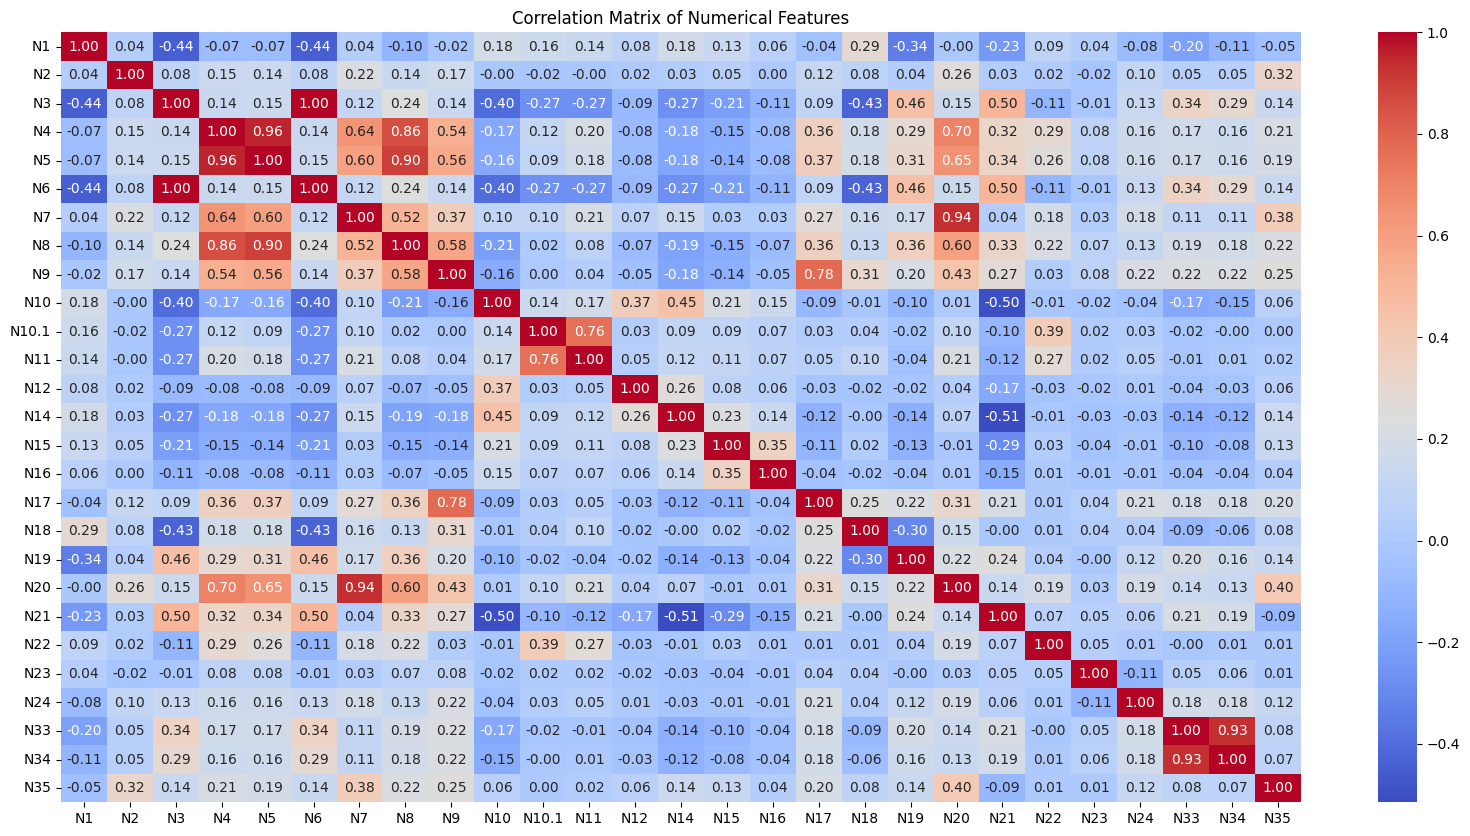

In [20]:
# Plot the correlation
correlation_matrix = X_train.iloc[:, 8:].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Target Variable Analysis

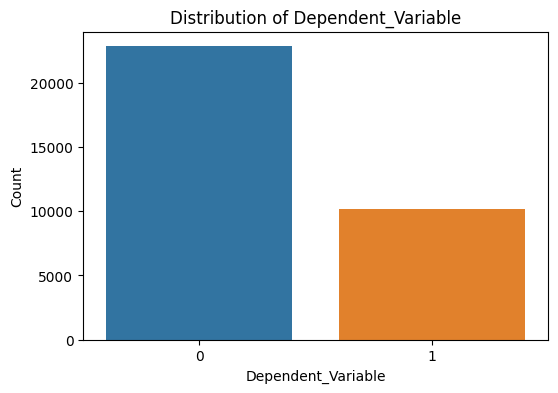

Class Distribution:
Dependent_Variable
0    22844
1    10206
Name: count, dtype: int64


In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=y_train, x='Dependent_Variable')
plt.title('Distribution of Dependent_Variable')
plt.xlabel('Dependent_Variable')
plt.ylabel('Count')

class_distribution = y_train['Dependent_Variable'].value_counts()

plt.show()

print("Class Distribution:")
print(class_distribution)

In [47]:
# Find the columns with low variance to drop

var_thres = VarianceThreshold(threshold=0.1)
var_thres.fit(X_train)

# Get the low-variance columns
low_variance_cols = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]

print("Low-Variance Columns:")
print(low_variance_cols)

Low-Variance Columns:
['C8', 'N16', 'N21']


In [50]:
X_train.drop(low_variance_cols, axis=1, inplace=True)
X_test.drop(low_variance_cols, axis=1, inplace=True)

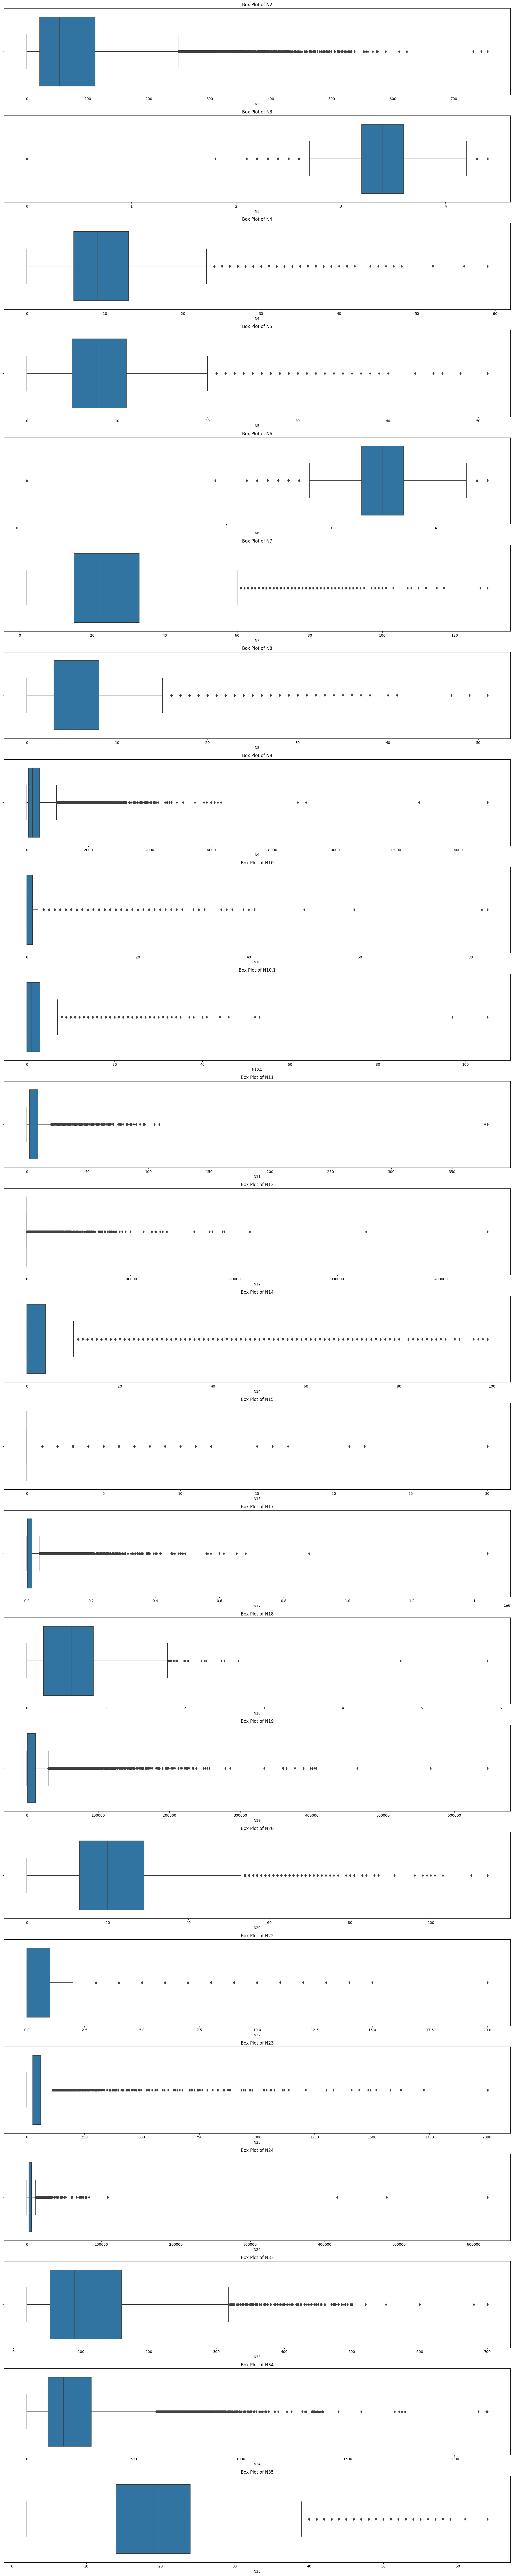

In [51]:
# Outliers plot
numerical_features = X_train.iloc[:, 8:]

fig, axes = plt.subplots(nrows=len(numerical_features.columns), ncols=1, figsize=(20, 100))

for i, feature in enumerate(numerical_features.columns):
    ax = axes[i]
    sns.boxplot(data=numerical_features, x=feature, ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel(feature)

plt.tight_layout()

plt.show()

In [52]:
# Fill Outliers with mean of the corresponding column
z_scores = np.abs(stats.zscore(X_train))
threshold = 3
for col in X_train.columns:
    for i in range(len(X_train)):
        if z_scores.iloc[i, X_train.columns.get_loc(col)] > threshold:
            X_train[col][i] = X_train[col].mean()

In [56]:
# Fill the remaining missing data with median
def fill_missing(df):
    miss_percent = df.isnull().sum() / len(df)
    cols = miss_percent[miss_percent > 0.0].index
    df[cols] = df[cols].fillna(df[cols].median())
    return df

In [57]:
X_train = fill_missing(X_train)
X_test = fill_missing(X_test)

In [58]:
# After filling the missing data
X_train.isnull().sum()/len(X_train)

C1       0.0
C2       0.0
C3       0.0
C4       0.0
C5       0.0
C6       0.0
C7       0.0
N1       0.0
N2       0.0
N3       0.0
N4       0.0
N5       0.0
N6       0.0
N7       0.0
N8       0.0
N9       0.0
N10      0.0
N10.1    0.0
N11      0.0
N12      0.0
N14      0.0
N15      0.0
N17      0.0
N18      0.0
N19      0.0
N20      0.0
N22      0.0
N23      0.0
N24      0.0
N33      0.0
N34      0.0
N35      0.0
dtype: float64

In [59]:
X_test.isnull().sum()/len(X_train)

C1       0.0
C2       0.0
C3       0.0
C4       0.0
C5       0.0
C6       0.0
C7       0.0
N1       0.0
N2       0.0
N3       0.0
N4       0.0
N5       0.0
N6       0.0
N7       0.0
N8       0.0
N9       0.0
N10      0.0
N10.1    0.0
N11      0.0
N12      0.0
N14      0.0
N15      0.0
N17      0.0
N18      0.0
N19      0.0
N20      0.0
N22      0.0
N23      0.0
N24      0.0
N33      0.0
N34      0.0
N35      0.0
dtype: float64

In [60]:
X_train.head()

,C1,C2,C3,C4,C5,C6,C7,N1,N2,N3,...,N17,N18,N19,N20,N22,N23,N24,N33,N34,N35
0,1.0,0.0,11.0,31.000000,0.0,0,0,23.75,53.0,2.5,...,6073.0,0.56,3352.0,20.0,1.0,27.816,1750.000000,58.0,113.39,12.0
1,1.0,4.0,2.0,14.437398,2.0,0,1,11.05,22.0,3.7,...,1944.0,0.06,25856.0,17.0,1.0,40.000,10833.333330,160.0,262.10,17.0
2,1.0,0.0,19.0,2.000000,0.0,0,0,29.00,53.0,2.4,...,6073.0,0.56,3352.0,20.0,1.0,20.000,6250.000000,24.0,50.29,18.0
3,1.0,1.0,16.0,47.000000,1.0,0,4,17.99,1.0,3.5,...,8244.0,0.89,1006.0,6.0,0.0,26.000,2413.666667,70.0,126.52,27.0
4,1.0,1.0,13.0,1.000000,1.0,1,6,27.50,206.0,3.8,...,57532.0,0.97,3398.0,31.0,0.0,44.000,7666.666667,100.0,205.47,21.0


## Scaling

In [94]:
scaler = StandardScaler()

In [95]:
cat_cols = X_train.iloc[:, :7].columns.tolist()
num_cols = X_train.iloc[:, 7:].columns.tolist()

In [96]:
X_train_numerical = X_train.drop(columns = cat_cols)

In [97]:
X_train_numerical_standard = scaler.fit_transform(X_train_numerical)

In [98]:
X_train_numerical_standard = pd.DataFrame(X_train_numerical_standard, columns = num_cols)

In [99]:
X_train_numerical_standard.head()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,N17,N18,N19,N20,N22,N23,N24,N33,N34,N35
0,0.465913,-0.305530,-2.103356,-0.095293,-0.064954,-2.103356,-1.071682,-1.459411,-0.918442,0.423000,...,-0.264071,0.082360,-0.320833,-0.131475,0.070721,-0.201644,-0.986092,-0.681424,-0.631655,-1.037571
1,-1.100871,-0.693900,0.832210,1.254827,0.797275,0.832210,-0.437180,-0.460472,-0.685531,-0.340337,...,-0.394040,-1.456517,0.769404,-0.390940,0.070721,-0.117594,1.894022,0.522904,0.374686,-0.353127
2,1.113600,-0.305530,-2.347986,-0.095293,-0.064954,-2.347986,-0.578181,-0.959941,-0.869919,2.331342,...,-0.264071,0.082360,-0.320833,-0.131475,0.070721,-0.255561,0.440754,-1.082866,-1.058661,-0.216239
3,-0.244691,-0.956990,0.342949,-1.059665,-0.927184,0.342949,-1.353683,-0.210737,-0.303817,-0.340337,...,-0.195733,1.098019,-0.434488,-1.342311,-0.806326,-0.214171,-0.775659,-0.539738,-0.542802,1.015760
4,0.928546,1.611267,1.076841,0.290455,0.581718,1.076841,0.408822,1.037937,3.946803,-0.340337,...,1.355720,1.344239,-0.318604,0.819896,-0.806326,-0.090001,0.889946,-0.185524,-0.008537,0.194428


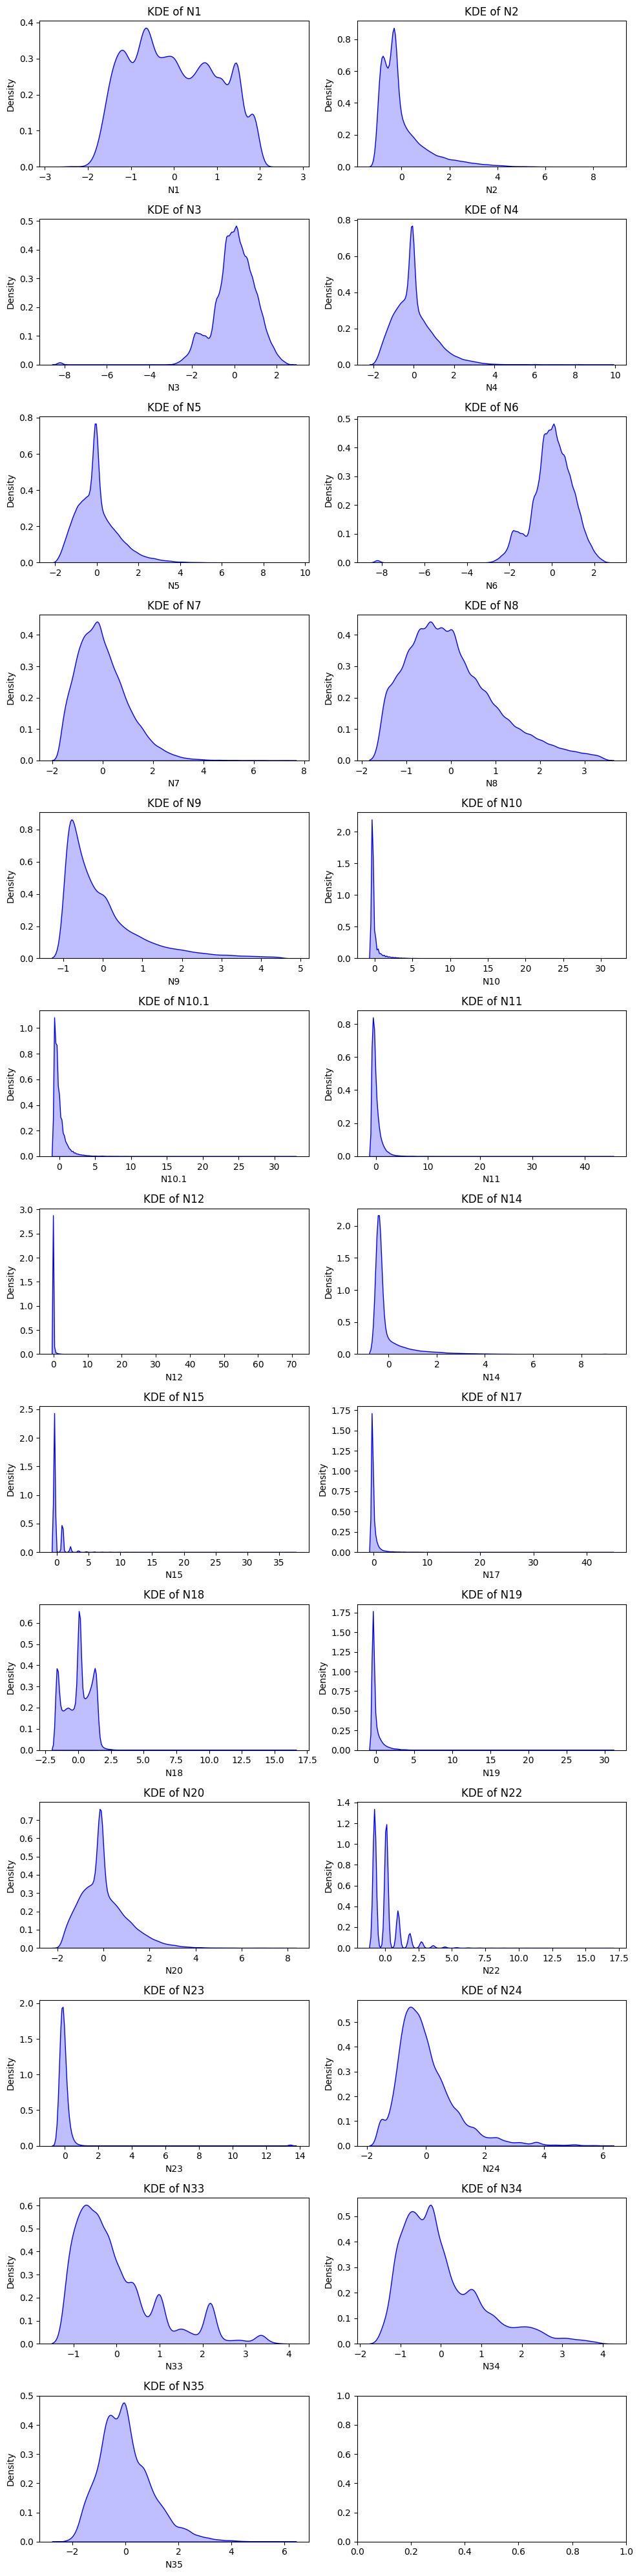

In [201]:
# Density plot after scaling
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(10, 40))

for i, feature in enumerate(num_cols):
    ax = axes[i//2][i%2]
    sns.kdeplot(X_train_numerical_standard[feature], ax=ax, color='b', shade=True)
    ax.set_title(f'KDE of {feature}')
    ax.set_xlabel(feature)

plt.tight_layout()

plt.show()

In [112]:
# Concat Scaled numerical data with X_train
X_train.drop(num_cols, axis=1, inplace=True)
X_train = pd.concat([X_train.reset_index(drop = True), X_train_numerical_standard], axis=1)

In [115]:
# repeat the same with X_test
scaler = StandardScaler()
X_test_numerical = X_test.drop(columns = cat_cols)
X_test_numerical_standard = scaler.fit_transform(X_test_numerical)
X_test_numerical_standard = pd.DataFrame(X_test_numerical_standard, columns = num_cols)
X_test.drop(num_cols, axis=1, inplace=True)
X_test = pd.concat([X_test.reset_index(drop = True), X_test_numerical_standard], axis=1)

In [118]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      33050 non-null  float64
 1   C2      33050 non-null  float64
 2   C3      33050 non-null  float64
 3   C4      33050 non-null  float64
 4   C5      33050 non-null  float64
 5   C6      33050 non-null  int64  
 6   C7      33050 non-null  int64  
 7   N1      33050 non-null  float64
 8   N2      33050 non-null  float64
 9   N3      33050 non-null  float64
 10  N4      33050 non-null  float64
 11  N5      33050 non-null  float64
 12  N6      33050 non-null  float64
 13  N7      33050 non-null  float64
 14  N8      33050 non-null  float64
 15  N9      33050 non-null  float64
 16  N10     33050 non-null  float64
 17  N10.1   33050 non-null  float64
 18  N11     33050 non-null  float64
 19  N12     33050 non-null  float64
 20  N14     33050 non-null  float64
 21  N15     33050 non-null  float64
 22

In [119]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      11017 non-null  int64  
 1   C2      11017 non-null  int64  
 2   C3      11017 non-null  int64  
 3   C4      11017 non-null  int64  
 4   C5      11017 non-null  int64  
 5   C6      11017 non-null  int64  
 6   C7      11017 non-null  int64  
 7   N1      11017 non-null  float64
 8   N2      11017 non-null  float64
 9   N3      11017 non-null  float64
 10  N4      11017 non-null  float64
 11  N5      11017 non-null  float64
 12  N6      11017 non-null  float64
 13  N7      11017 non-null  float64
 14  N8      11017 non-null  float64
 15  N9      11017 non-null  float64
 16  N10     11017 non-null  float64
 17  N10.1   11017 non-null  float64
 18  N11     11017 non-null  float64
 19  N12     11017 non-null  float64
 20  N14     11017 non-null  float64
 21  N15     11017 non-null  float64
 22

## Training and Testing

## Logistic Regression

In [128]:
y_train = y_train['Dependent_Variable']

In [129]:
X, X_cv, y, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=1101)

In [131]:
log_reg_model = LogisticRegression()

In [132]:
log_reg_model.fit(X, y)

LogisticRegression()

In [137]:
y_prob = log_reg_model.predict_proba(X)[:,1]

In [146]:
print("Training AUC Score : ", roc_auc_score(y, y_prob))

Training AUC Score :  0.7367702642920484


In [142]:
y_cv_prob = log_reg_model.predict_proba(X_cv)[:,1]

In [148]:
print("CV AUC Score : ",roc_auc_score(y_cv, y_cv_prob))

CV AUC Score :  0.7422658435538066


In [154]:
fpr, tpr, thresholds = roc_curve(y_cv,  y_cv_prob)
roc_auc = roc_auc_score(y_cv,  y_cv_prob)

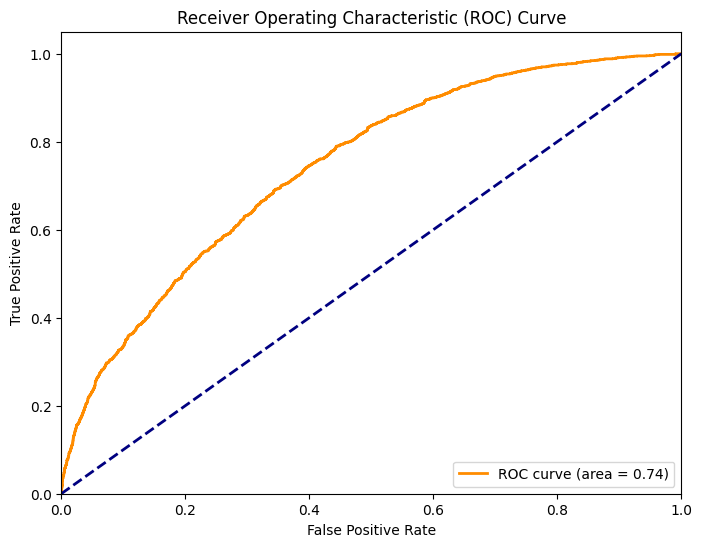

In [155]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## XGBoost

In [151]:
xgb_model = xgb.XGBClassifier()

In [156]:
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [157]:
y_prob = xgb_model.predict_proba(X)[:, 1]

In [159]:
y_prob_score = roc_auc_score(y, y_prob)
print("Training AUC Score : ", y_prob_score)

Training AUC Score :  0.9321880444363484


In [160]:
y_cv_prob = xgb_model.predict_proba(X_cv)[:, 1]

In [161]:
y_cv_prob_score = roc_auc_score(y_cv, y_cv_prob)
print("CV AUC Score : ", y_cv_prob_score)

CV AUC Score :  0.7692632588035275


In [162]:
fpr, tpr, thresholds = roc_curve(y_cv,  y_cv_prob)
roc_auc = roc_auc_score(y_cv,  y_cv_prob)

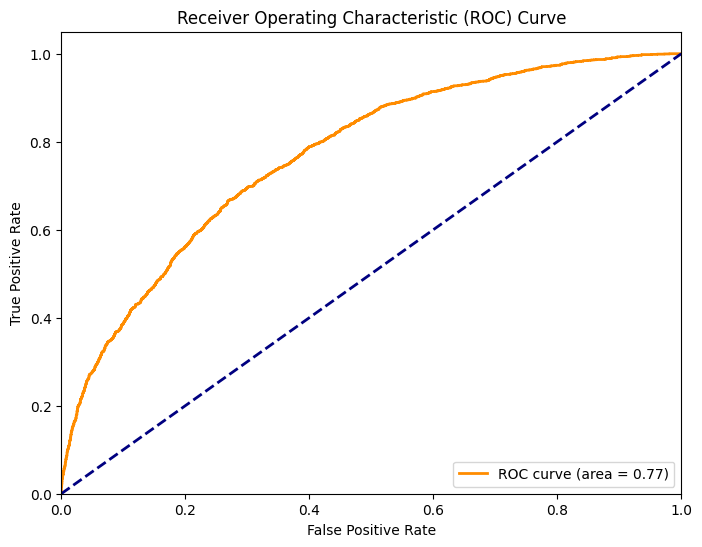

In [163]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## LightGBM

In [165]:
lgbm_model = LGBMClassifier()

In [166]:
lgbm_model.fit(X, y)

[LightGBM] [Info] Number of positive: 8230, number of negative: 18210
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4520
[LightGBM] [Info] Number of data points in the train set: 26440, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.311271 -> initscore=-0.794185
[LightGBM] [Info] Start training from score -0.794185


LGBMClassifier()

In [169]:
y_prob = lgbm_model.predict_proba(X)[:,1]

In [170]:
y_prob_score = roc_auc_score(y, y_prob)
print("Training AUC Score : ", y_prob_score)

Training AUC Score :  0.8573691367687497


In [172]:
y_cv_prob = lgbm_model.predict_proba(X_cv)[:,1]

In [173]:
y_cv_prob_score = roc_auc_score(y_cv, y_cv_prob)
print("CV AUC Score : ", y_cv_prob_score)

CV AUC Score :  0.7780330954623371


In [174]:
fpr, tpr, thresholds = roc_curve(y_cv,  y_cv_prob)
roc_auc = roc_auc_score(y_cv,  y_cv_prob)

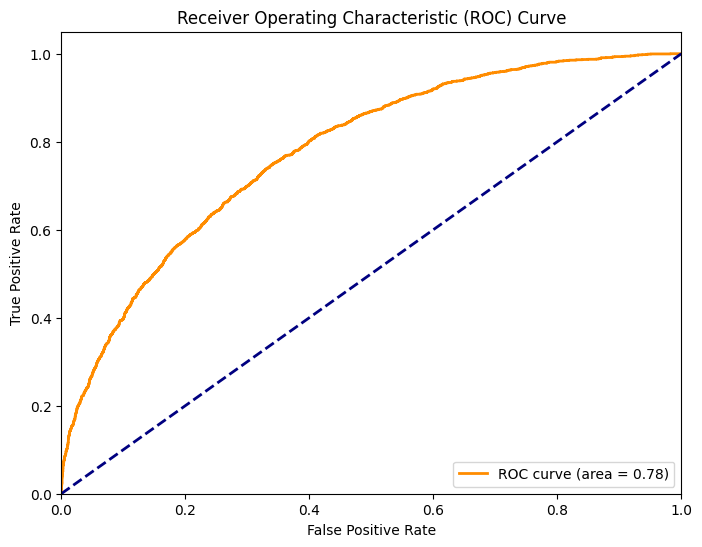

In [175]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

As we got better score from LGBM model, I use it to predict the Dependent_Variable on X_test

In [192]:
y_test_prob = lgbm_model.predict_proba(X_test)[:,1]

In [188]:
X_test_ids = pd.read_csv('./Test/X_test.csv')['Unique_ID']

In [196]:
result_df = pd.DataFrame({'Unique_ID': X_test_ids, 'Class_1_Probability': y_test_prob})

In [197]:
result_df

,Unique_ID,Class_1_Probability
0,Candidate_1602,0.425683
1,Candidate_29650,0.392080
2,Candidate_31061,0.331099
3,Candidate_5768,0.161144
4,Candidate_27059,0.414007
...,...,...
11012,Candidate_7453,0.420326
11013,Candidate_38211,0.178418
11014,Candidate_25020,0.376962
11015,Candidate_44501,0.256363


In [199]:
result_df.to_csv('final_predictions.csv', index=False)